In [1]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline

In [2]:
model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, revision="fp16", use_auth_token=True)
pipe = pipe.to(device)

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


In [3]:
prompt = "a photo of an astronaut riding a horse on mars"

In [4]:
with autocast("cuda"):
    image = pipe(prompt, guidance_scale=7.5)["sample"][0]  

In [5]:
image.save("astronaut_rides_horse.png")

# ----------------------

In [10]:
import matplotlib.pyplot as plt

In [11]:
images = []
with autocast("cuda"):
    for i in range(9):
        images.append(pipe(prompt, guidance_scale=7.5)["sample"][0])

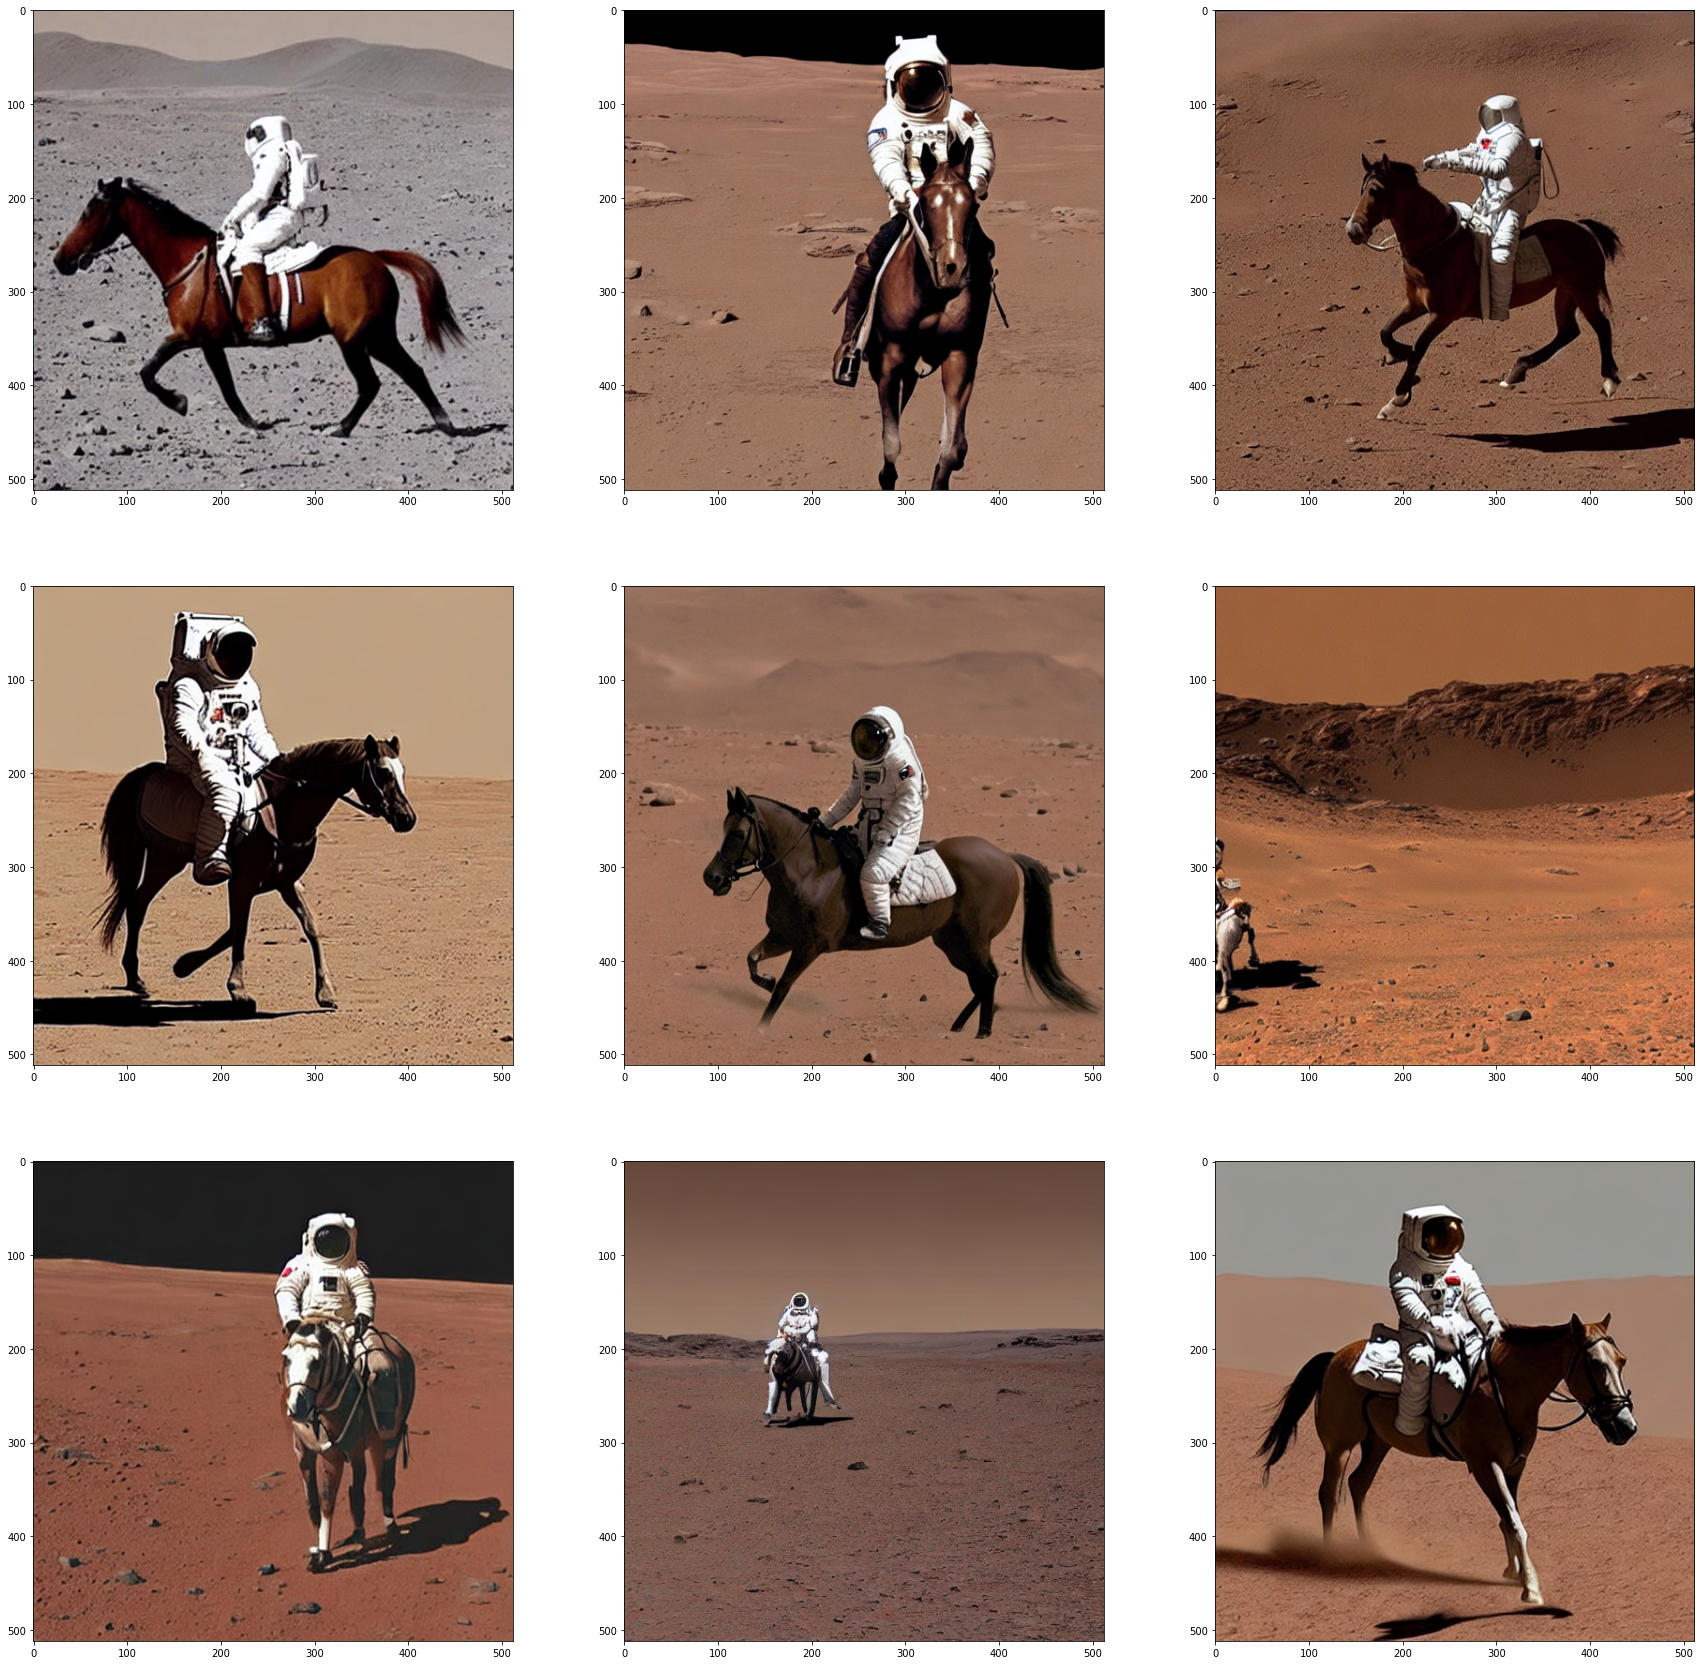

In [16]:
f, axarr = plt.subplots(3,3, figsize=(30,30))
for i in range(9):
    x = i//3
    y = i%3
    axarr[x,y].imshow(images[i])